In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.patches as mpatches
import fiona 



Load all of the data files

In [6]:
ship_data_path =  rf'D:\Datasets\Illegal Fishing\Processed Data\Filtered_Ships_with_Illegal_Status.csv'
ship_data = pd.read_csv(ship_data_path)

gdb_path_land = rf'D:\Datasets\Illegal Fishing\Original Data\ne_10m_land\ne_10m_land.shp'
land_data = gpd.read_file(gdb_path_land)

# Path to the .gdb folder 
gdb_path = r"D:\Datasets\Illegal Fishing\Original Data\mpatlas_export_geo_202503_BhMDKpV\mpatlas_export_geo_202503\mpatlas_export_geo_202503\mpatlas_export_geo_202503\mpatlas_export_mar2025.gdb"

#load data
layer_name = 'zoneassessment_geom'
mpa_data = gpd.read_file(gdb_path, layer=layer_name).to_crs(epsg=4326)


Plot Latitude and Longitude data alongside Marine Protected Zones

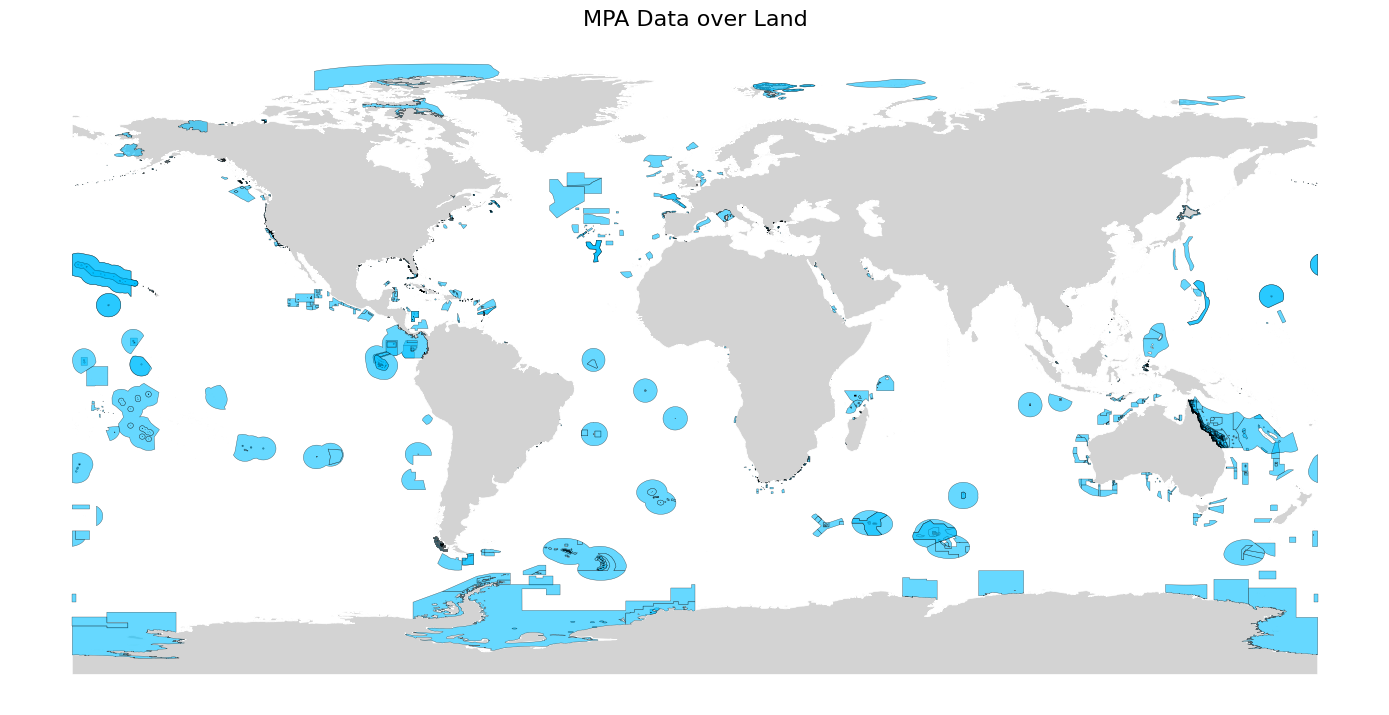

In [4]:
# --- Plot together ---
fig, ax = plt.subplots(figsize=(14, 10))

# Plot land as the base layer (light gray)
land_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Plot the MPA data (blue with transparency)
mpa_data.plot(ax=ax, color='deepskyblue', alpha=0.6, edgecolor='black', linewidth=0.3)

# Customize the plot
ax.set_title("MPA Data over Land", fontsize=16)
ax.set_axis_off()

# Display the plot
plt.tight_layout()
plt.show()


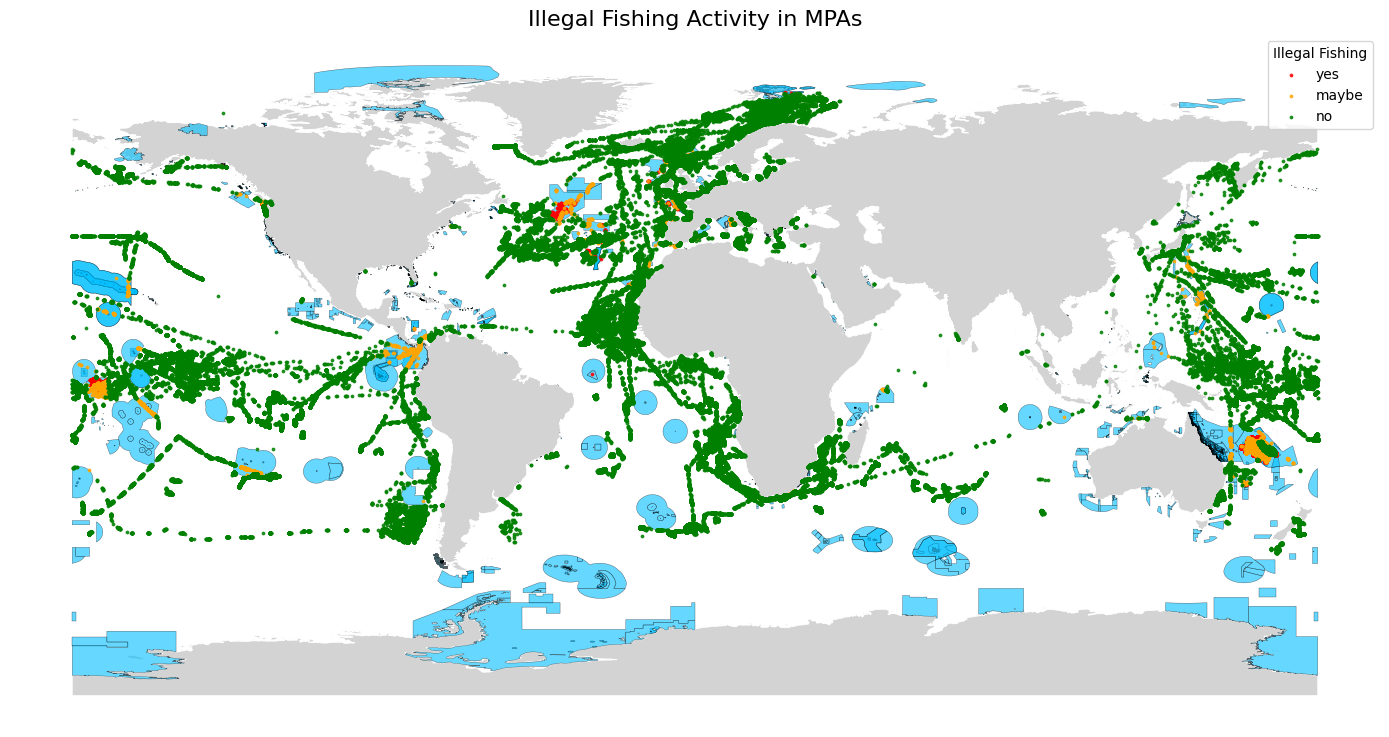

In [9]:
# Load filtered ship data with 'illegal' column
ship_df = pd.read_csv(rf'D:\Datasets\Illegal Fishing\Processed Data\Filtered_Ships_with_Illegal_Status.csv')

# Convert to GeoDataFrame
ship_gdf = gpd.GeoDataFrame(ship_df, geometry=gpd.points_from_xy(ship_df.lon, ship_df.lat), crs='EPSG:4326')


# Define custom colors
color_map = {
    'yes': 'red',
    'maybe': 'orange',
    'no': 'green'
}

# Map colors to the GeoDataFrame
ship_gdf['color'] = ship_gdf['illegal'].map(color_map)

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
land_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)
mpa_data.plot(ax=ax, color='deepskyblue', alpha=0.6, edgecolor='black', linewidth=0.3)

# Plot each category separately for a custom legend
for status, color in color_map.items():
    subset = ship_gdf[ship_gdf['illegal'] == status]
    subset.plot(ax=ax, markersize=3, color=color, label=status, alpha=0.8)

# Legend and title
ax.legend(title='Illegal Fishing')
ax.set_title("Illegal Fishing Activity in MPAs", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

The plot shows clear illegal fishing hotspots, located northeast of Australia, North Atlantic Ocean and Central Pacific ocean. 